In [1]:
# %pip install numpy
# %pip install codecarbon
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scikit-learn
# %pip install tensorflow


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from codecarbon import EmissionsTracker
sns.set()

In [8]:
data = pd.read_csv("Cardiovascular_Disease_Dataset (1).csv")

In [9]:
data.head(1000)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [11]:
# # Iniciar o monitoramento de consumo de energia
tracker = EmissionsTracker()
tracker.start()

# Parar o monitoramento de consumo de energia
# tracker.stop()

[codecarbon INFO @ 21:31:43] [setup] RAM Tracking...
[codecarbon INFO @ 21:31:43] [setup] GPU Tracking...
[codecarbon INFO @ 21:31:43] No GPU found.


[codecarbon INFO @ 21:31:43] [setup] CPU Tracking...
[codecarbon WARNING @ 21:31:43] No CPU tracking mode found. Falling back on CPU constant mode. 
 Windows OS detected: Please install Intel Power Gadget to measure CPU

[codecarbon INFO @ 21:31:45] CPU Model on constant consumption mode: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz
[codecarbon INFO @ 21:31:45] >>> Tracker's metadata:
[codecarbon INFO @ 21:31:45]   Platform system: Windows-10-10.0.26120-SP0
[codecarbon INFO @ 21:31:45]   Python version: 3.10.11
[codecarbon INFO @ 21:31:45]   CodeCarbon version: 2.7.2
[codecarbon INFO @ 21:31:45]   Available RAM : 15.875 GB
[codecarbon INFO @ 21:31:45]   CPU count: 8
[codecarbon INFO @ 21:31:45]   CPU model: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz
[codecarbon INFO @ 21:31:45]   GPU count: None
[codecarbon INFO @ 21:31:45]   GPU model: None
[codecarbon INFO @ 21:31:45] Saving emissions data to file h:\Backup 12-01\Area de trabalho\source\PJ-Topicos_Avancados\emissions.csv


In [12]:
target_counts = data.target.value_counts()
target_counts

target
1    580
0    420
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x203bb4145b0>,
 [Text(-0.2735589045026723, 1.0654414698927848, '1'),
  Text(0.27355899764652647, -1.065441445977501, '0')],
 [Text(-0.1492139479105485, 0.5811498926687917, '58.0%'),
  Text(0.14921399871628713, -0.5811498796240914, '42.0%')])

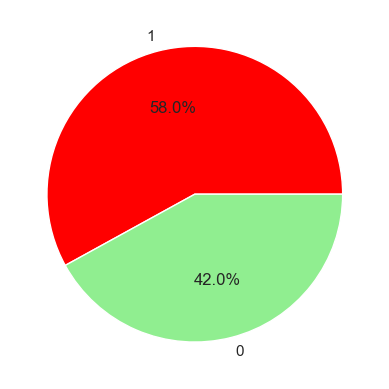

In [13]:
plt.pie(target_counts,labels=target_counts.index,autopct='%1.1f%%',colors=['red','lightgreen'])

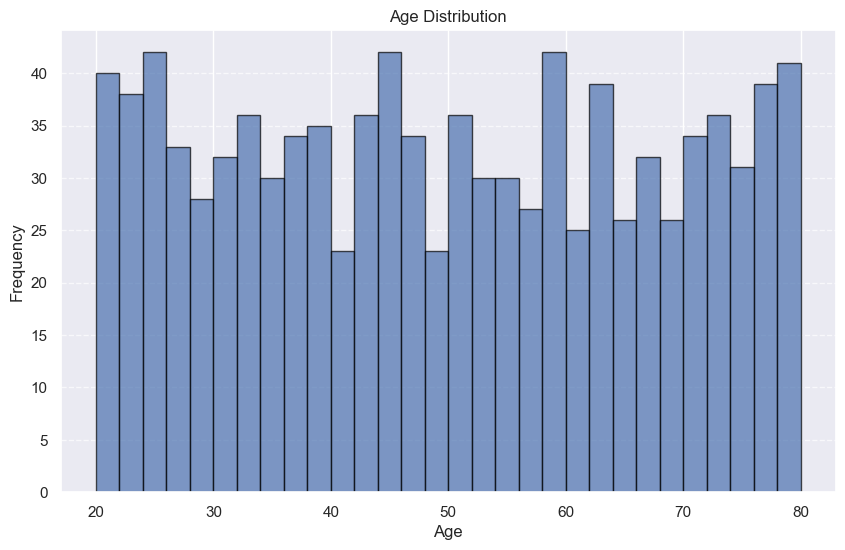

[codecarbon INFO @ 21:32:00] Energy consumed for RAM : 0.000025 kWh. RAM Power : 5.953227996826172 W
[codecarbon INFO @ 21:32:00] Energy consumed for all CPUs : 0.000058 kWh. Total CPU Power : 14.0 W
[codecarbon INFO @ 21:32:00] 0.000083 kWh of electricity used since the beginning.


In [14]:
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
features = list(data.columns)
features.remove('target')
data1 = data[features + ['target']]

In [16]:
data1

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


[codecarbon INFO @ 21:32:15] Energy consumed for RAM : 0.000050 kWh. RAM Power : 5.953227996826172 W
[codecarbon INFO @ 21:32:15] Energy consumed for all CPUs : 0.000117 kWh. Total CPU Power : 14.0 W
[codecarbon INFO @ 21:32:15] 0.000166 kWh of electricity used since the beginning.


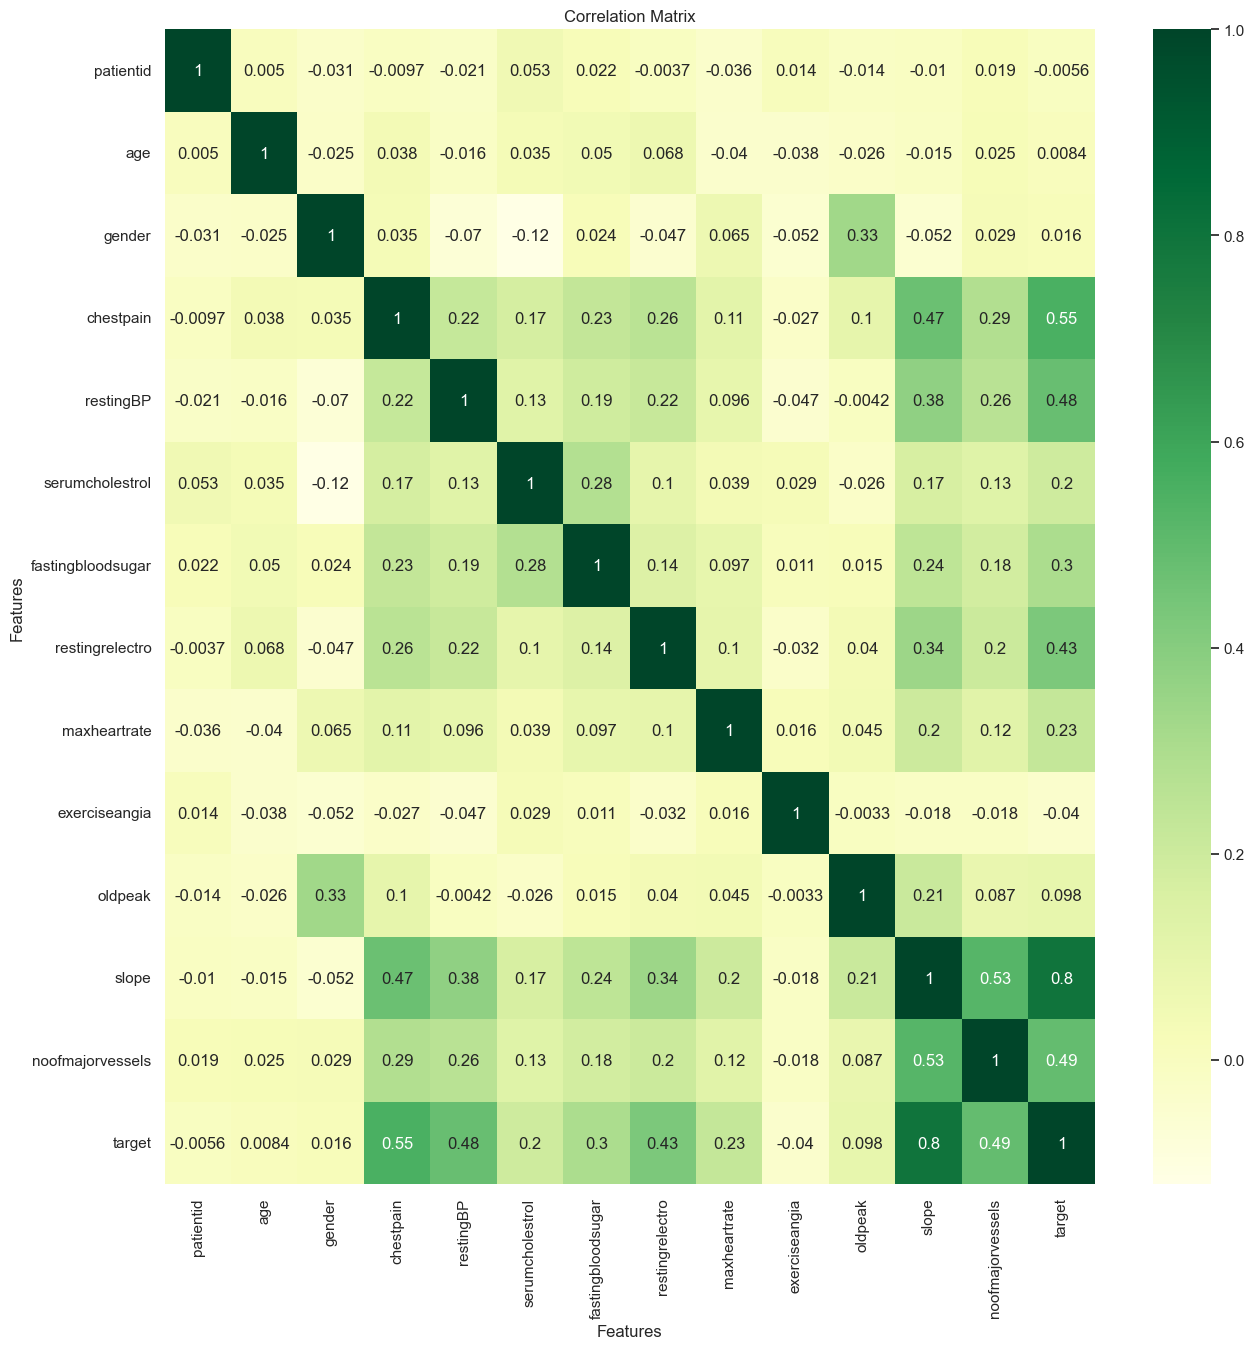

[codecarbon INFO @ 21:32:30] Energy consumed for RAM : 0.000074 kWh. RAM Power : 5.953227996826172 W
[codecarbon INFO @ 21:32:30] Energy consumed for all CPUs : 0.000175 kWh. Total CPU Power : 14.0 W
[codecarbon INFO @ 21:32:30] 0.000249 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:32:45] Energy consumed for RAM : 0.000099 kWh. RAM Power : 5.953227996826172 W
[codecarbon INFO @ 21:32:45] Energy consumed for all CPUs : 0.000233 kWh. Total CPU Power : 14.0 W
[codecarbon INFO @ 21:32:45] 0.000333 kWh of electricity used since the beginning.


In [17]:
correlation_matrix = data1.corr()
fig,ax=plt.subplots(figsize=(15,15))

ax=sns.heatmap(correlation_matrix, annot=True, cmap="YlGn")

plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Matrix")
plt.show()

In [19]:
X=data1.drop(['patientid','target'],axis=1)
X.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels'],
      dtype='object')

In [20]:
y=data1['target']
patientid=data1['patientid']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, patientid, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Important: Use transform, not fit_transform, on test data

[codecarbon INFO @ 21:37:00] Energy consumed for RAM : 0.000520 kWh. RAM Power : 5.953227996826172 W
[codecarbon INFO @ 21:37:00] Energy consumed for all CPUs : 0.001225 kWh. Total CPU Power : 14.0 W
[codecarbon INFO @ 21:37:00] 0.001745 kWh of electricity used since the beginning.


In [23]:
hyperparameters = {
    'penalty': 'l2',
    'solver': 'lbfgs',  # Solver algorithm
    'max_iter': 1000  # number of iterations
}

In [24]:
model_log = LogisticRegression(**hyperparameters)
result_log=model_log.fit(X_train, y_train)

In [ ]:
y_log_pred = model_log.predict(X_test)
y_log_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1])

[codecarbon INFO @ 21:37:15] Energy consumed for RAM : 0.000545 kWh. RAM Power : 5.953227996826172 W
[codecarbon INFO @ 21:37:15] Energy consumed for all CPUs : 0.001283 kWh. Total CPU Power : 14.0 W
[codecarbon INFO @ 21:37:15] 0.001828 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:37:30] Energy consumed for RAM : 0.000570 kWh. RAM Power : 5.953227996826172 W
[codecarbon INFO @ 21:37:30] Energy consumed for all CPUs : 0.001341 kWh. Total CPU Power : 14.0 W
[codecarbon INFO @ 21:37:30] 0.001911 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:37:45] Energy consumed for RAM : 0.000595 kWh. RAM Power : 5.953227996826172 W
[codecarbon INFO @ 21:37:45] Energy consumed for all CPUs : 0.001400 kWh. Total CPU Power : 14.0 W
[codecarbon INFO @ 21:37:45] 0.001994 kWh of electricity used since the beginning.
[codecarbon INFO @ 21:37:45] 0.000544 g.CO2eq/s mean an estimation of 17.166654022035708 kg.CO2eq/year
[codecarbon INFO @ 21:38:00] Energy consumed for

In [ ]:
accuracy = accuracy_score(y_test, y_log_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_log_pred))

In [ ]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test, y_log_pred)
confusion_matrix

In [ ]:
%pip install statsmodels
import statsmodels.api as sm
logit_model = sm.Logit(y_train, X_train)
result_smlog = logit_model.fit()

print(result_smlog.summary())

In [ ]:
smlog_pred=result_smlog.predict(X_test)
smlog_pred_binary = (smlog_pred >= 0.5).astype(int)

accuracy_logit = accuracy_score(y_test, smlog_pred_binary)
print("Accuracy:", accuracy_logit)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
auc_score = roc_auc_score(y_test, smlog_pred_binary)
auc_score

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, smlog_pred_binary)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cmlg = confusion_matrix(y_test, smlog_pred_binary)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cmlg, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test data')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Reduce the dimensionality of the feature space using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Train a logistic regression model on the reduced feature space
model_log_pca = LogisticRegression(**hyperparameters)
model_log_pca.fit(X_train_pca, y_train)

# Define a meshgrid for the reduced feature space
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Calculate the predicted probabilities for each point in the meshgrid
Z = model_log_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary along with the training data points in the reduced space
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('a ')
plt.ylabel('b')
plt.title('Logistic Regression Decision Boundary')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
# %pip install tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape=(12,)),  # Define input shape using Input layer
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.5), #Aumentando a taxa de regularização para (0.5), visando reduzir o overfitting
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Treinamento e avaliação do modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=200, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

In [ ]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=200, validation_split=0.2)

In [ ]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
model = tf.keras.models.Sequential([
    keras.Input(shape=(X_train_scaled.shape[1],)),  # Define input shape using Input layer
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

In [ ]:
model = tf.keras.models.Sequential([
       tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
       tf.keras.layers.Dense(100, activation='relu'),
       tf.keras.layers.BatchNormalization(),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(100, activation='relu'),
       tf.keras.layers.Dense(1, activation='sigmoid')
   ])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
deepmodel= model.fit(X_train_scaled, y_train, epochs=100, batch_size=200, validation_split=0.2)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Parar o monitoramento de consumo de energia e imprimir o relatório
tracker.stop()